In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

In [173]:
data = pd.read_csv('Dataset/asoiaf-master/data/asoiaf-all-edges.csv')
#data = data[["Entity A", "Entity B"]]
#data.to_csv("Dataset\lasftm_asia\lastfm_asia_edges.txt", header = False, index = False, sep = " ")

In [174]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(data,source="Source", target = "Target", create_using=Graphtype)
#G = nx.read_edgelist('Dataset\lasftm_asia\lastfm_asia_edges.txt', create_using = nx.Graph(), nodetype=str)

In [175]:
print(nx.info(G))

Graph with 796 nodes and 2823 edges


In [129]:
#Si mantengono solo i nodi con un grado superiore a 50
#to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 3]
#for x in to_be_removed:
#    G.remove_node(x)
#print(nx.info(G))

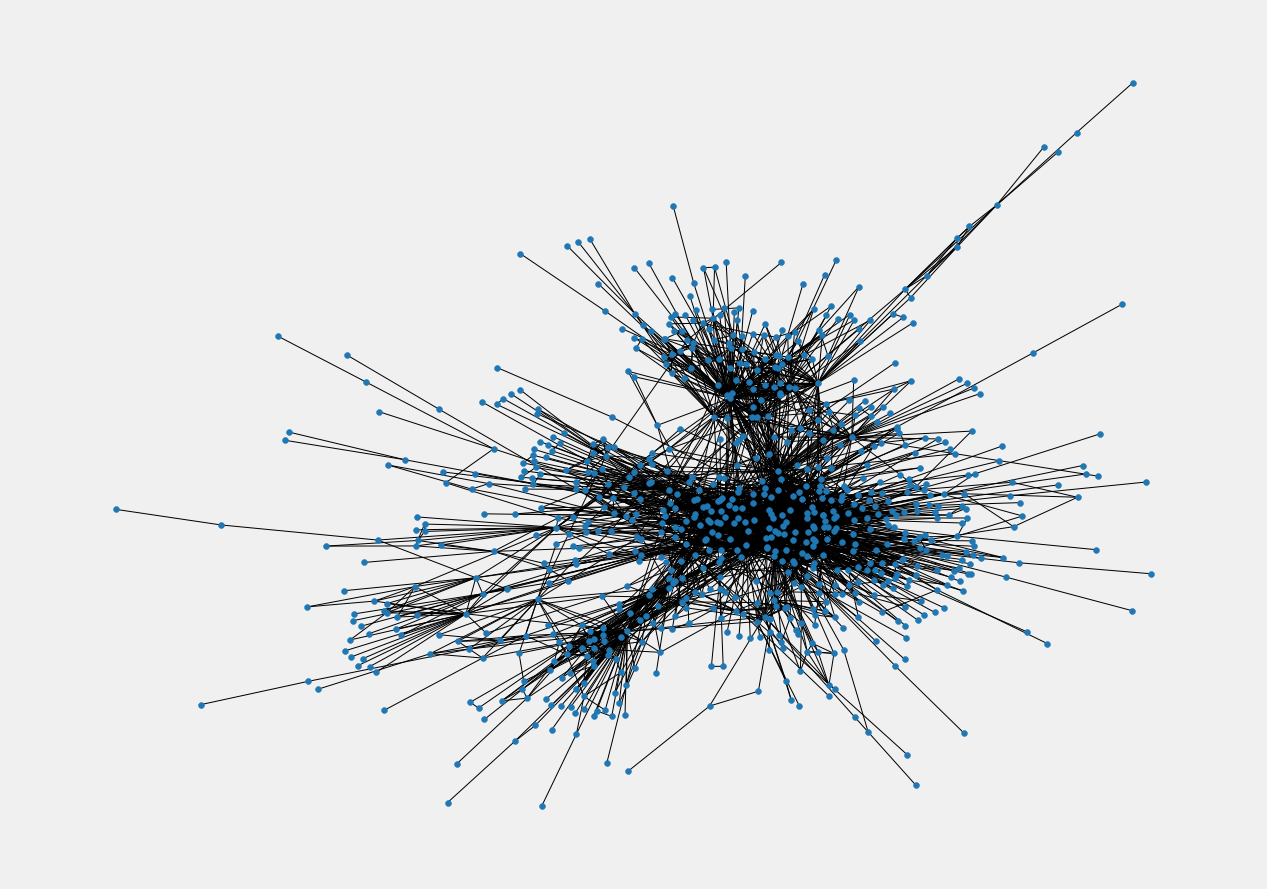

In [177]:
pos = nx.spring_layout(G)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

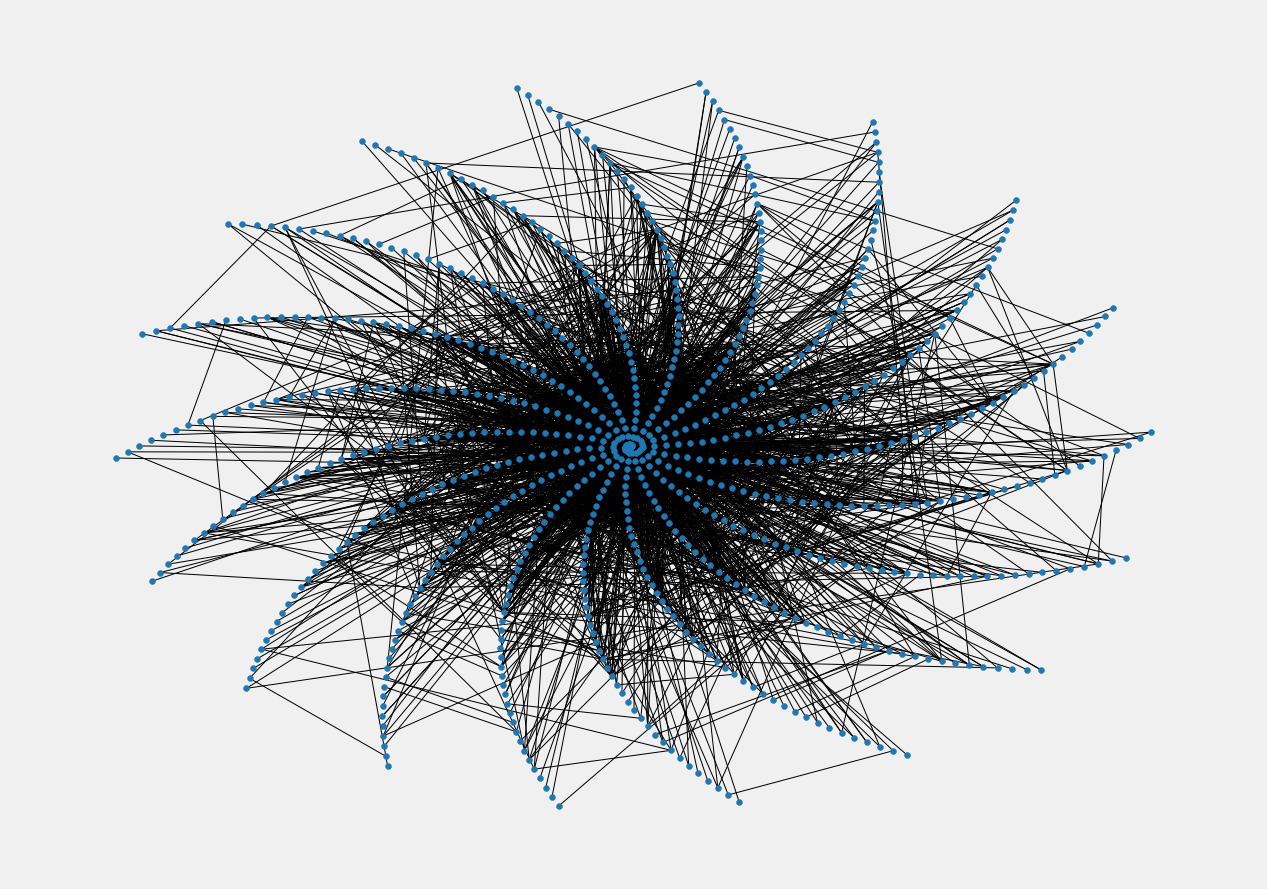

In [178]:
pos = nx.spiral_layout(G)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

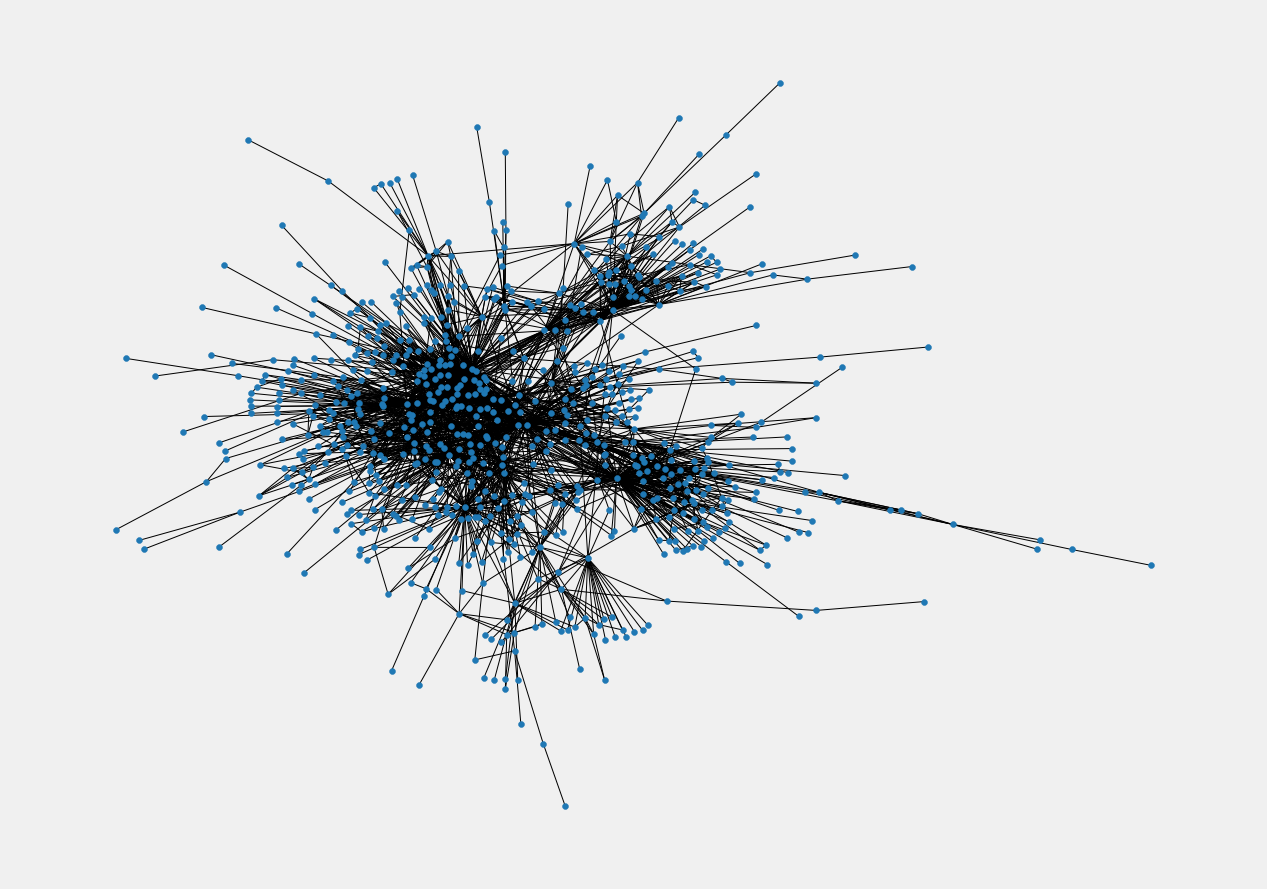

In [179]:
pos = nx.fruchterman_reingold_layout(G)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

<AxesSubplot:ylabel='Density'>

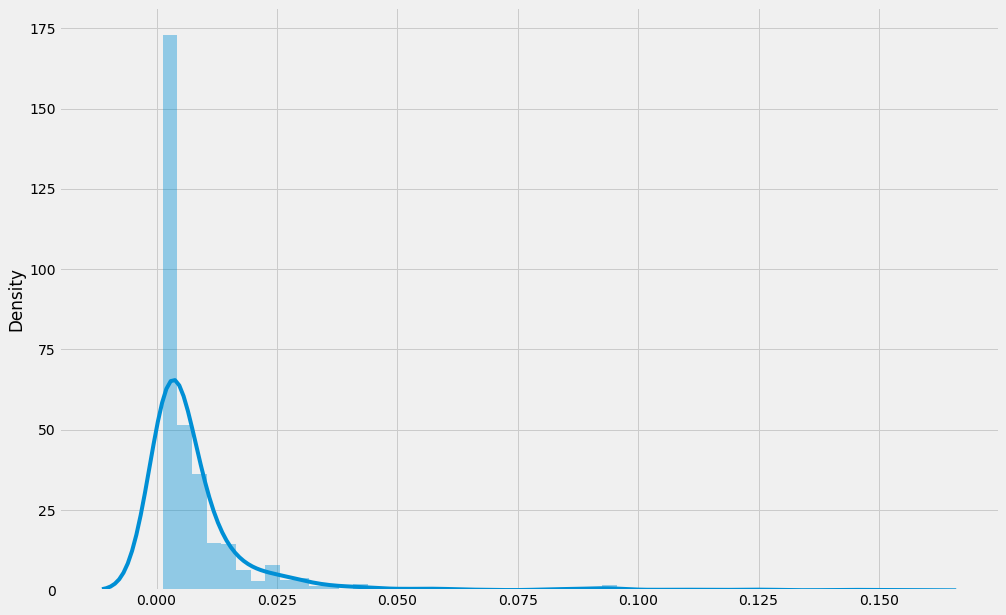

In [183]:
degree = nx.degree_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=True)

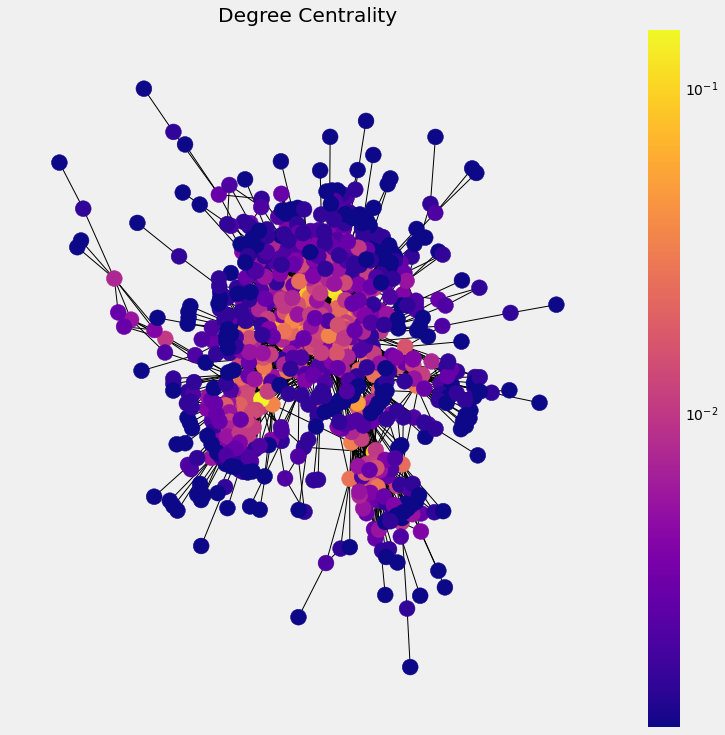

In [181]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
draw(G, pos, degree, 'Degree Centrality')

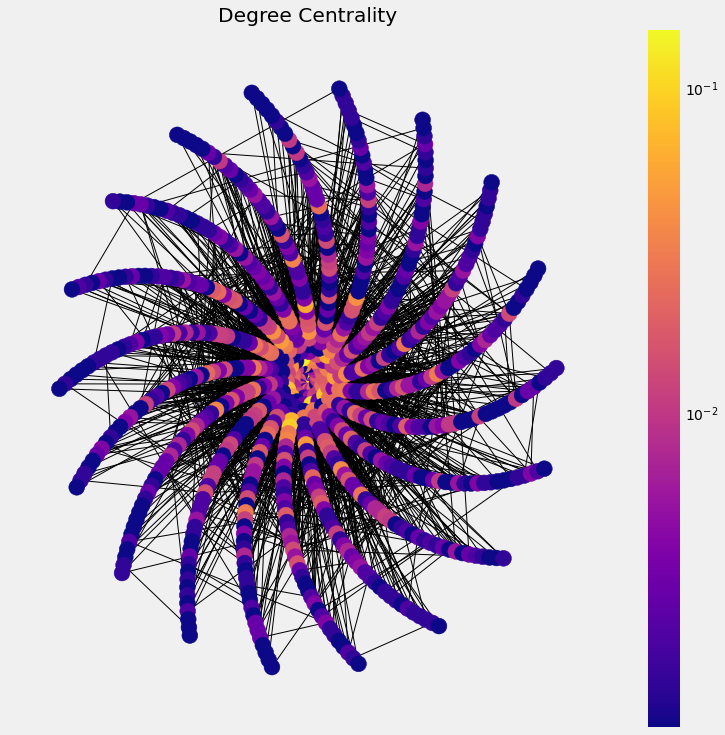

In [182]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(G)
draw(G, pos, degree, 'Degree Centrality')

<AxesSubplot:ylabel='Density'>

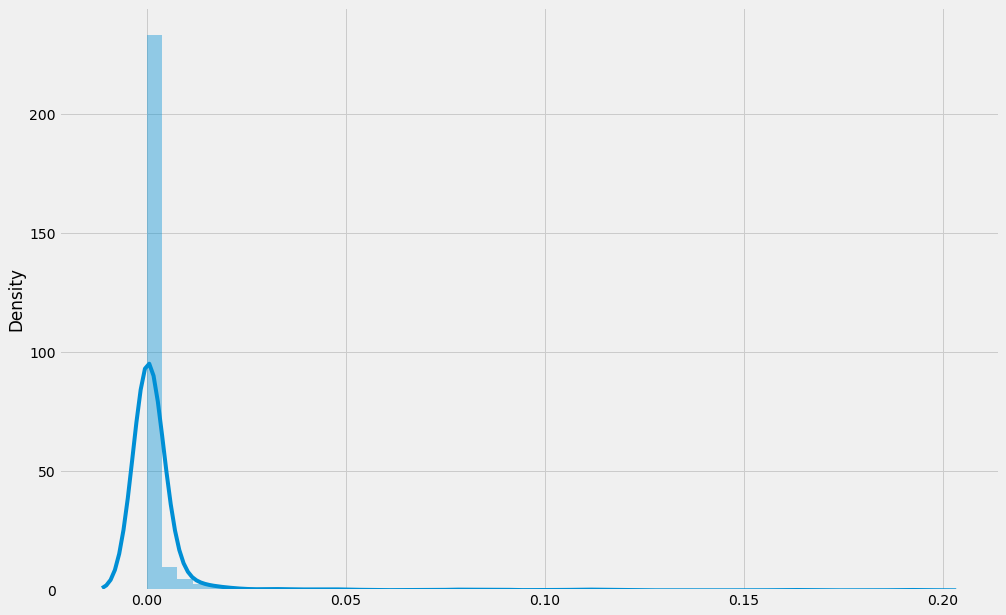

In [184]:
bet = nx.betweenness_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=True)